In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
%matplotlib inline

#https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting?resource=download

In [2]:
#Read in the dataframe
df = pd.read_csv("Data/Turbine_Data.csv")
#Rename the Time column from unnamed
df.rename(columns={'Unnamed: 0':'Time'}, inplace = True)
df

Time  ActivePower  AmbientTemperatue  \
0       2017-12-31 00:00:00+00:00          NaN                NaN   
1       2017-12-31 00:10:00+00:00          NaN                NaN   
2       2017-12-31 00:20:00+00:00          NaN                NaN   
3       2017-12-31 00:30:00+00:00          NaN                NaN   
4       2017-12-31 00:40:00+00:00          NaN                NaN   
...                           ...          ...                ...   
118219  2020-03-30 23:10:00+00:00    70.044465          27.523741   
118220  2020-03-30 23:20:00+00:00    40.833474          27.602882   
118221  2020-03-30 23:30:00+00:00    20.777790          27.560925   
118222  2020-03-30 23:40:00+00:00    62.091039          27.810472   
118223  2020-03-30 23:50:00+00:00    68.664425          27.915828   

        BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
0                           NaN               NaN               NaN   
1                           NaN               NaN               NaN   
2                           NaN               NaN               NaN   
3                           NaN               NaN               NaN   
4                           NaN               NaN               NaN   
...                         ...               ...               ...   
118219                45.711129          1.515669          1.950088   
118220                45.598573          1.702809          2.136732   
118221                45.462045          1.706214          2.139664   
118222                45.343827          1.575352          2.009781   
118223                45.231610          1.499323          1.933124   

        Blade3PitchAngle  ControlBoxTemperature  GearboxBearingTemperature  \
0                    NaN                    NaN                        NaN   
1                    NaN                    NaN                        NaN   
2                    NaN                    NaN                        NaN   
3                    NaN                    NaN                        NaN   
4                    NaN                    NaN                        NaN   
...                  ...                    ...                        ...   
118219          1.950088                    0.0                  59.821165   
118220          2.136732                    0.0                  59.142038   
118221          2.139664                    0.0                  58.439439   
118222          2.009781                    0.0                  58.205413   
118223          1.933124                    0.0                  58.581716   

        GearboxOilTemperature  ...  GeneratorWinding2Temperature  \
0                         NaN  ...                           NaN   
1                         NaN  ...                           NaN   
2                         NaN  ...                           NaN   
3                         NaN  ...                           NaN   
4                         NaN  ...                           NaN   
...                       ...  ...                           ...   
118219              55.193793  ...                     58.148777   
118220              54.798545  ...                     57.550367   
118221              54.380456  ...                     57.099335   
118222              54.079014  ...                     56.847239   
118223              54.080505  ...                     56.741040   

        HubTemperature  MainBoxTemperature  NacellePosition  ReactivePower  \
0                  NaN                 NaN              NaN            NaN   
1                  NaN                 NaN              NaN            NaN   
2                  NaN                 NaN              NaN            NaN   
3                  NaN                 NaN              NaN            NaN   
4                  NaN                 NaN              NaN            NaN   
...                ...                 ...              ...            ...   
118219       39.008931           36.476562     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Time                          118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

In [4]:
#Convert the time column to a datatime object
df['Time']  = pd.to_datetime(df['Time'])

In [5]:
#Drop useless columns such as WTG, since we are only looking at one Wind Turbine so this value is constant
# WTG only has "GO1" values
print(df["WTG"].unique())
del(df["WTG"])

print(df["ControlBoxTemperature"].unique())
# remove this column since the only values are 0s and nans
del(df["ControlBoxTemperature"])

['G01']
[nan  0.]


In [6]:
#Data Cleaning
#Make it so that rows that are solely null values are dropped
noTime = df.drop('Time', axis=1, inplace=False)
#Store it as a new dataframe to prevent errors when working on a dataframe copy
df = pd.DataFrame(df[noTime.notnull().any(axis=1)])
df

Time  ActivePower  AmbientTemperatue  \
144    2018-01-01 00:00:00+00:00    -5.357727          23.148729   
145    2018-01-01 00:10:00+00:00    -5.822360          23.039754   
146    2018-01-01 00:20:00+00:00    -5.279409          22.948703   
147    2018-01-01 00:30:00+00:00    -4.648054          22.966851   
148    2018-01-01 00:40:00+00:00    -4.684632          22.936520   
...                          ...          ...                ...   
118219 2020-03-30 23:10:00+00:00    70.044465          27.523741   
118220 2020-03-30 23:20:00+00:00    40.833474          27.602882   
118221 2020-03-30 23:30:00+00:00    20.777790          27.560925   
118222 2020-03-30 23:40:00+00:00    62.091039          27.810472   
118223 2020-03-30 23:50:00+00:00    68.664425          27.915828   

        BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
144                         NaN               NaN               NaN   
145                         NaN               NaN               NaN   
146                         NaN               NaN               NaN   
147                         NaN               NaN               NaN   
148                         NaN               NaN               NaN   
...                         ...               ...               ...   
118219                45.711129          1.515669          1.950088   
118220                45.598573          1.702809          2.136732   
118221                45.462045          1.706214          2.139664   
118222                45.343827          1.575352          2.009781   
118223                45.231610          1.499323          1.933124   

        Blade3PitchAngle  GearboxBearingTemperature  GearboxOilTemperature  \
144                  NaN                        NaN                    NaN   
145                  NaN                        NaN                    NaN   
146                  NaN                        NaN                    NaN   
147                  NaN                        NaN                    NaN   
148                  NaN                        NaN                    NaN   
...                  ...                        ...                    ...   
118219          1.950088                  59.821165              55.193793   
118220          2.136732                  59.142038              54.798545   
118221          2.139664                  58.439439              54.380456   
118222          2.009781                  58.205413              54.079014   
118223          1.933124                  58.581716              54.080505   

        GeneratorRPM  GeneratorWinding1Temperature  \
144              NaN                           NaN   
145              NaN                           NaN   
146              NaN                           NaN   
147              NaN                           NaN   
148              NaN                           NaN   
...              ...                           ...   
118219   1029.870744                     59.060367   
118220   1030.160478                     58.452003   
118221   1030.137822                     58.034071   
118222   1030.178178                     57.795387   
118223   1029.834789                     57.694813   

        GeneratorWinding2Temperature  HubTemperature  MainBoxTemperature  \
144                              NaN             NaN                 NaN   
145                              NaN             NaN                 NaN   
146                              NaN             NaN                 NaN   
147                              NaN             NaN                 NaN   
148                              NaN             NaN                 NaN   
...                              ...             ...                 ...   
118219                     58.148777       39.008931           36.476562   
118220                     57.550367       39.006759           36.328125   
118221                     57.099335       39.003815           36.131944   
118222      

In [7]:
# checking for duplicate rows
df.duplicated().sum()

0

In [8]:
df = df.dropna(subset=["ActivePower", "ReactivePower", "WindSpeed"])

In [9]:
df.isnull().sum() / df.shape[0]

Time                            0.000000
ActivePower                     0.000000
AmbientTemperatue               0.013707
BearingShaftTemperature         0.346182
Blade1PitchAngle                0.555951
Blade2PitchAngle                0.556926
Blade3PitchAngle                0.556926
GearboxBearingTemperature       0.346172
GearboxOilTemperature           0.345854
GeneratorRPM                    0.346913
GeneratorWinding1Temperature    0.345822
GeneratorWinding2Temperature    0.345812
HubTemperature                  0.347517
MainBoxTemperature              0.346384
NacellePosition                 0.235806
ReactivePower                   0.000000
RotorRPM                        0.348470
TurbineStatus                   0.339371
WindDirection                   0.235806
WindSpeed                       0.000000
dtype: float64

In [10]:
#Get the low NULL percent Columns and graph
nullPer =  df.isnull().sum() / df.shape[0]
lowNullCount = []
for nullP in nullPer:
    if((nullP > 0.0) & (nullP < .05)):
        lowNullCount.append(nullPer[nullPer == nullP].index[0])
plotList = []

for col in lowNullCount:
    plotList.append(ggplot(df) + aes(x=col) + geom_histogram(bins=20))

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 1294 rows containing non-finite values.


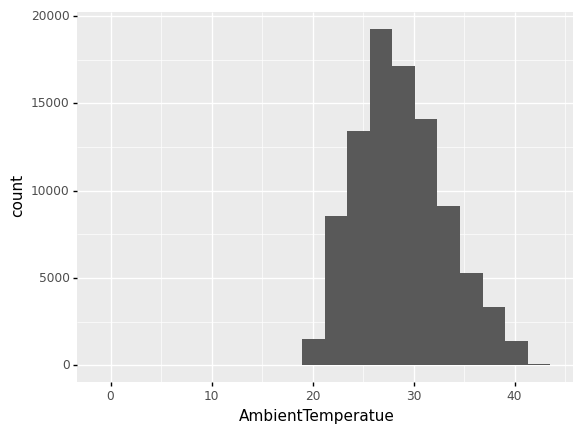

[<ggplot: (162114272494)>]

In [11]:
plotList

In [12]:
# Fill in the initial missing values now
for col in lowNullCount:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\kunse\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


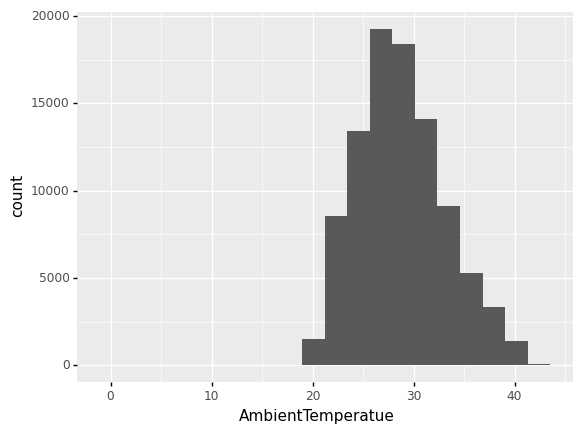

[<ggplot: (162114272494)>]

In [13]:
#checking the effect of median imputation
plotList

In [14]:
#Verify that the rest of the columns are not categorical, aka show that we shouldnt use the mode to fill the null data
uncleanedRows = df.drop(lowNullCount, axis=1, inplace=False)
uncleanedRows = uncleanedRows.drop("Time", axis=1, inplace=False)
for col in uncleanedRows.columns:
    print(col + " : " + str(uncleanedRows[col].unique().size))

ActivePower : 93742
BearingShaftTemperature : 61635
Blade1PitchAngle : 38930
Blade2PitchAngle : 38957
Blade3PitchAngle : 38957
GearboxBearingTemperature : 61642
GearboxOilTemperature : 61732
GeneratorRPM : 60489
GeneratorWinding1Temperature : 61739
GeneratorWinding2Temperature : 61736
HubTemperature : 37748
MainBoxTemperature : 48681
NacellePosition : 6662
ReactivePower : 93747
RotorRPM : 58727
TurbineStatus : 353
WindDirection : 6662
WindSpeed : 94047


In [15]:
# null values for each column
nullcols =  df.isnull().sum()
nullCount = []  
# record all columns with null values  
for nullC in nullcols:
    if(nullC > 0):
        nullCount.append(nullcols[nullcols == nullC].index[0])

#check ditribution of each column that has null values 
#(will use this information later to also help with removing outliers)
plotcols = []
for col in nullCount:
    plotcols.append(ggplot(df) + aes(x=col) + geom_histogram(bins=20))

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32681 rows containing non-finite values.


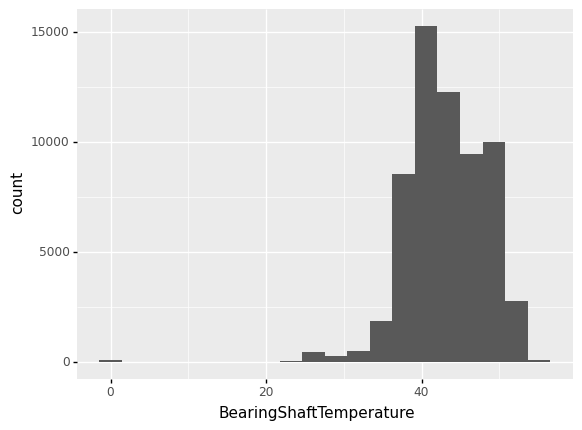

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 52484 rows containing non-finite values.


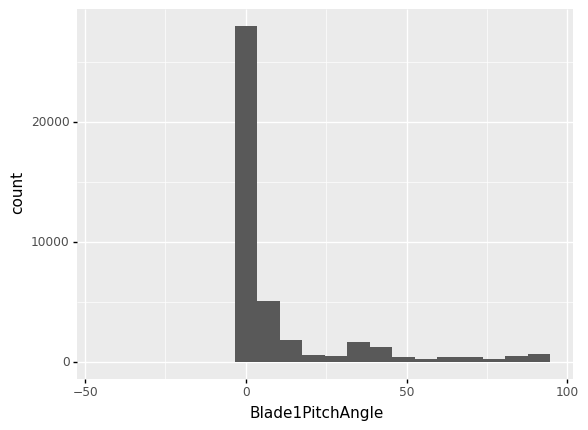

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 52576 rows containing non-finite values.


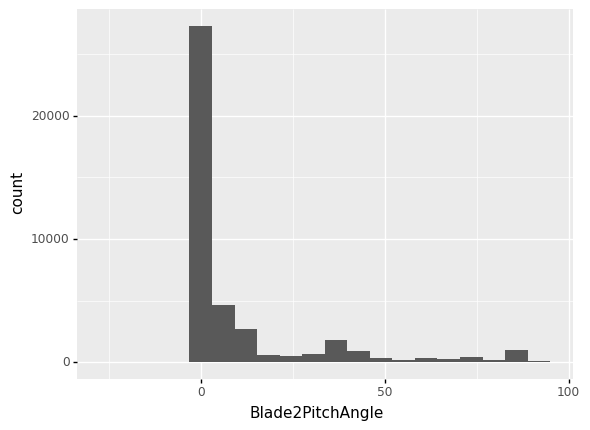

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 52576 rows containing non-finite values.


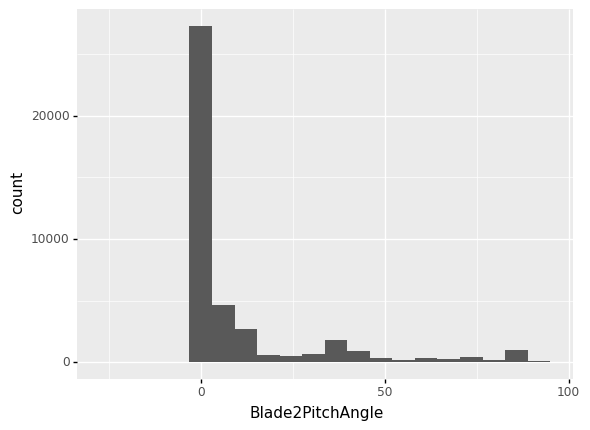

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32680 rows containing non-finite values.


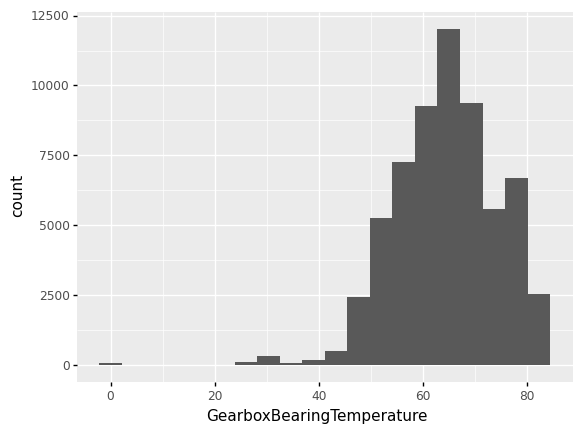

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32650 rows containing non-finite values.


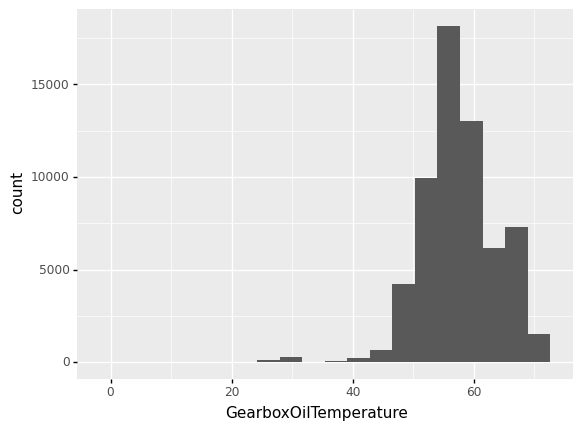

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32750 rows containing non-finite values.


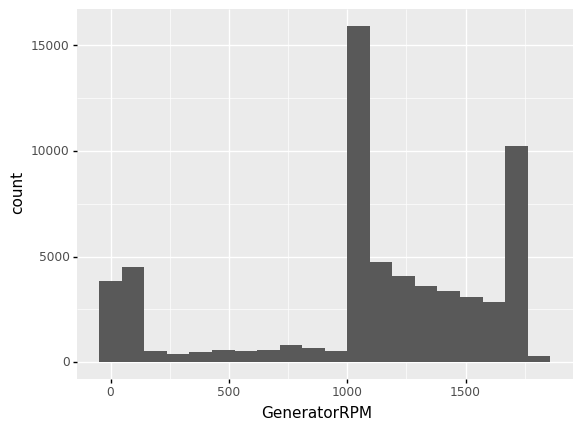

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32647 rows containing non-finite values.


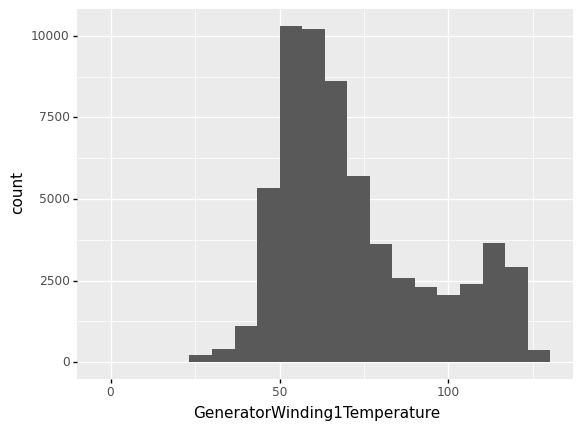

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32646 rows containing non-finite values.


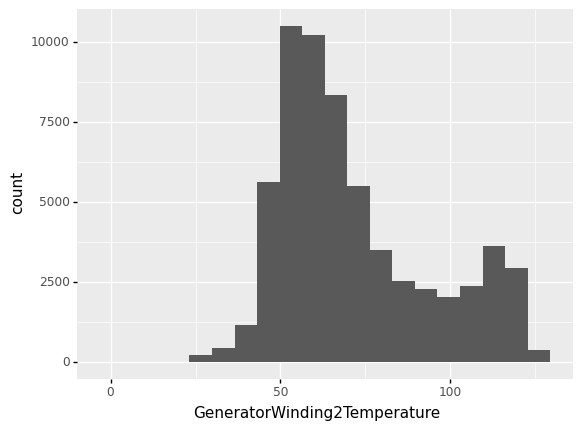

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32807 rows containing non-finite values.


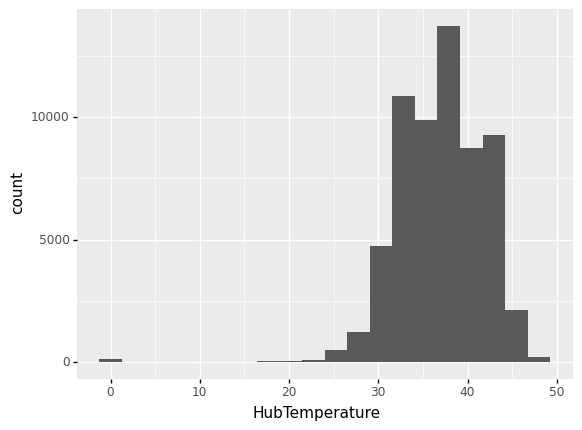

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32700 rows containing non-finite values.


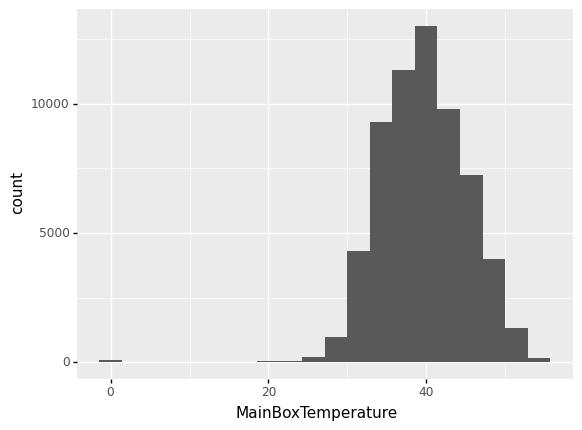

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 22261 rows containing non-finite values.


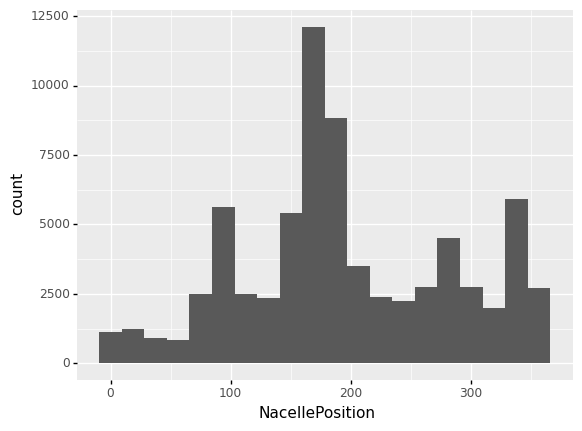

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32897 rows containing non-finite values.


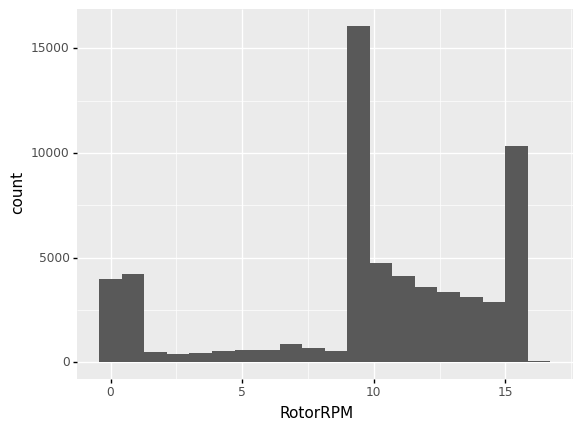

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 32038 rows containing non-finite values.


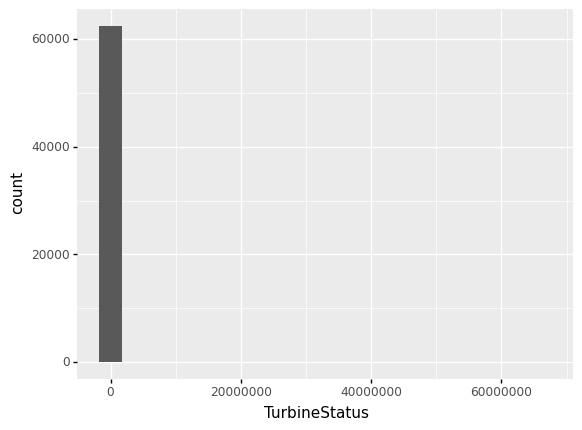

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 22261 rows containing non-finite values.


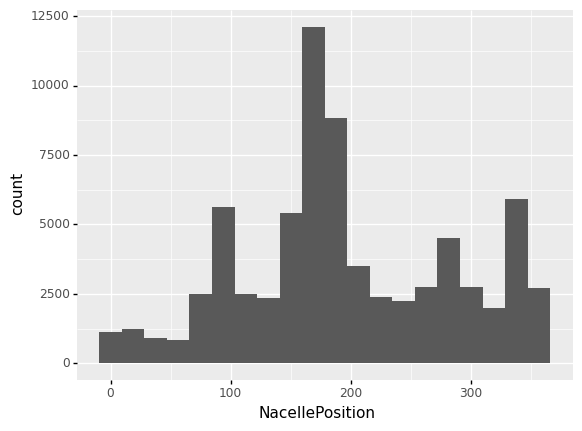

[<ggplot: (162114209208)>,
 <ggplot: (162114216912)>,
 <ggplot: (162114217292)>,
 <ggplot: (162114220782)>,
 <ggplot: (162114227688)>,
 <ggplot: (162114227369)>,
 <ggplot: (162114235880)>,
 <ggplot: (162114236239)>,
 <ggplot: (162114273512)>,
 <ggplot: (162114274229)>,
 <ggplot: (162114282216)>,
 <ggplot: (162114284020)>,
 <ggplot: (162114276069)>,
 <ggplot: (162114288360)>,
 <ggplot: (162114277160)>]

In [16]:
plotcols

[Text(0.5, 0, 'ActivePower'),
 Text(1.5, 0, 'AmbientTemperatue'),
 Text(2.5, 0, 'BearingShaftTemperature'),
 Text(3.5, 0, 'Blade1PitchAngle'),
 Text(4.5, 0, 'Blade2PitchAngle'),
 Text(5.5, 0, 'Blade3PitchAngle'),
 Text(6.5, 0, 'GearboxBearingTemperature'),
 Text(7.5, 0, 'GearboxOilTemperature'),
 Text(8.5, 0, 'GeneratorRPM'),
 Text(9.5, 0, 'GeneratorWinding1Temperature'),
 Text(10.5, 0, 'GeneratorWinding2Temperature'),
 Text(11.5, 0, 'HubTemperature'),
 Text(12.5, 0, 'MainBoxTemperature'),
 Text(13.5, 0, 'NacellePosition'),
 Text(14.5, 0, 'ReactivePower'),
 Text(15.5, 0, 'RotorRPM'),
 Text(16.5, 0, 'TurbineStatus'),
 Text(17.5, 0, 'WindDirection'),
 Text(18.5, 0, 'WindSpeed')]

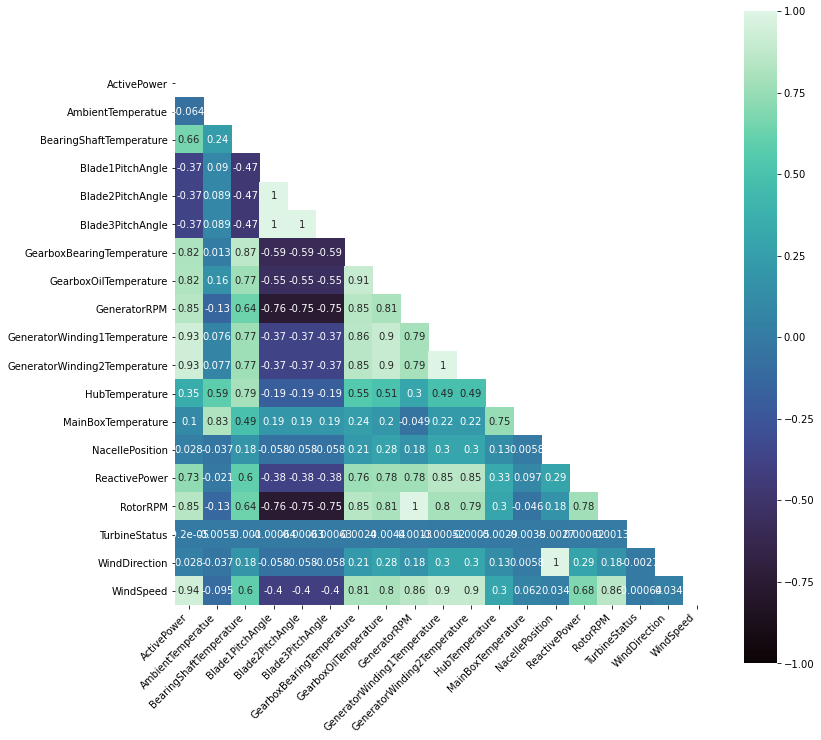

In [17]:
# Since we have many features, we will check for columns with high correlation and drop some features
# Compute the correlation matrix
corr = df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Heatmap to visualize correlations between features
plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr, mask=matrix,
    cmap="mako", annot=True,
    vmin=-1, vmax=1, center=0, 
    square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                   horizontalalignment='right')

In [18]:
# Getting columns with high correlations and printing the columns to help us spot high correlation columns easily in heatmap
corr_abs = df.corr().abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))

for col in upper.columns:
    if any(upper[col] > 0.9):
        print(col)

Blade2PitchAngle
Blade3PitchAngle
GearboxOilTemperature
GeneratorWinding1Temperature
GeneratorWinding2Temperature
RotorRPM
WindDirection
WindSpeed


<ipython-input-18-90ac1e974f90>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [19]:
df.isnull().sum()

Time                                0
ActivePower                         0
AmbientTemperatue                   0
BearingShaftTemperature         32681
Blade1PitchAngle                52484
Blade2PitchAngle                52576
Blade3PitchAngle                52576
GearboxBearingTemperature       32680
GearboxOilTemperature           32650
GeneratorRPM                    32750
GeneratorWinding1Temperature    32647
GeneratorWinding2Temperature    32646
HubTemperature                  32807
MainBoxTemperature              32700
NacellePosition                 22261
ReactivePower                       0
RotorRPM                        32897
TurbineStatus                   32038
WindDirection                   22261
WindSpeed                           0
dtype: int64

In [20]:
# Removing columns that have high correlations and similar distributions
# among the correlated columns, we remove the ones with lowest null values 
to_drop = ['GearboxOilTemperature','Blade2PitchAngle', 'Blade3PitchAngle','GeneratorWinding1Temperature',
           'RotorRPM','NacellePosition']

# creating new dataframe by dropping the above columns
df_new = df.drop(to_drop, axis=1, inplace=False)
df = pd.DataFrame(df_new)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94404 entries, 144 to 118223
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Time                          94404 non-null  datetime64[ns, UTC]
 1   ActivePower                   94404 non-null  float64            
 2   AmbientTemperatue             94404 non-null  float64            
 3   BearingShaftTemperature       61723 non-null  float64            
 4   Blade1PitchAngle              41920 non-null  float64            
 5   GearboxBearingTemperature     61724 non-null  float64            
 6   GeneratorRPM                  61654 non-null  float64            
 7   GeneratorWinding2Temperature  61758 non-null  float64            
 8   HubTemperature                61597 non-null  float64            
 9   MainBoxTemperature            61704 non-null  float64            
 10  ReactivePower                 9

In [21]:
#removing outliers using the interquartile range
cols = list(df.columns)
[cols.remove(x) for x in ["Time"]]
# Noting that Blade1PitchAngle had more than 50% missing values

Q3 = df[cols].quantile(0.75)
Q1 = df[cols].quantile(0.25)
iqr=Q3-Q1
df = df[~((df[cols] < (Q1 - 1.5 * iqr)) |(df[cols] > (Q3 + 1.5 * iqr))).any(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81359 entries, 144 to 118223
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Time                          81359 non-null  datetime64[ns, UTC]
 1   ActivePower                   81359 non-null  float64            
 2   AmbientTemperatue             81359 non-null  float64            
 3   BearingShaftTemperature       49480 non-null  float64            
 4   Blade1PitchAngle              33770 non-null  float64            
 5   GearboxBearingTemperature     49480 non-null  float64            
 6   GeneratorRPM                  49534 non-null  float64            
 7   GeneratorWinding2Temperature  49534 non-null  float64            
 8   HubTemperature                49368 non-null  float64            
 9   MainBoxTemperature            49461 non-null  float64            
 10  ReactivePower                 8

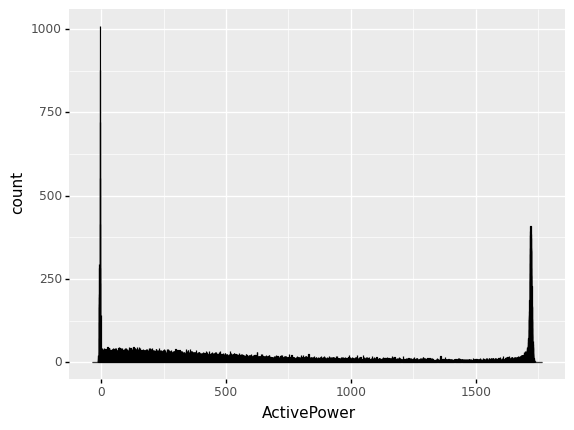

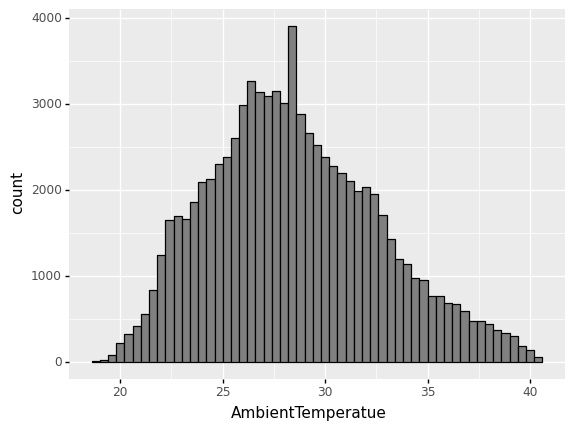

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31879 rows containing non-finite values.


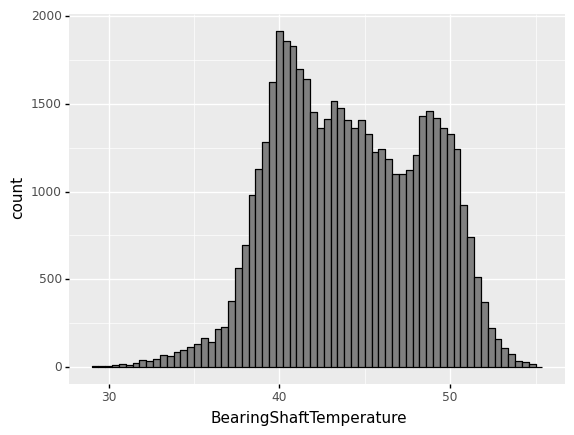

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 47589 rows containing non-finite values.


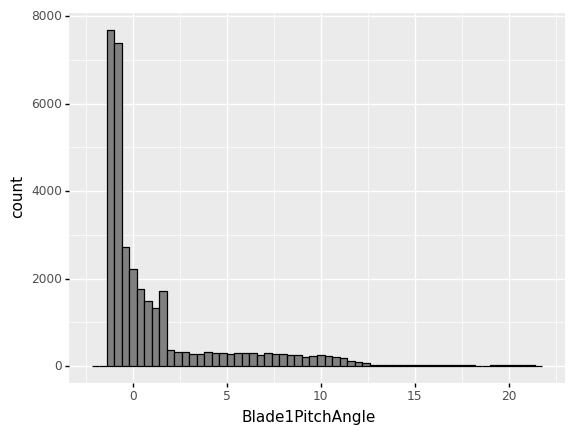

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31879 rows containing non-finite values.


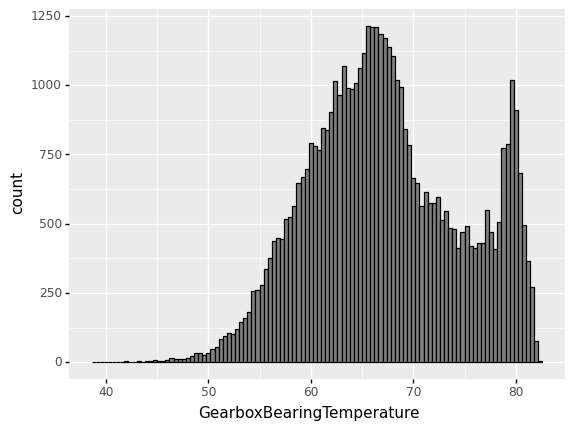

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31825 rows containing non-finite values.


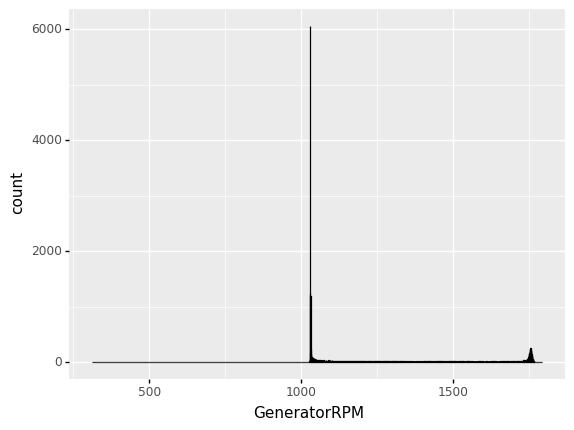

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31825 rows containing non-finite values.


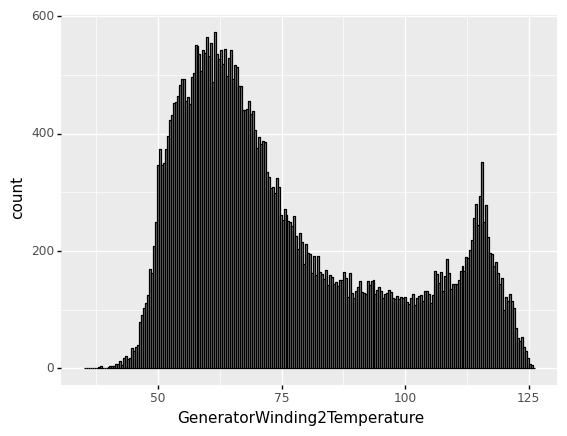

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31991 rows containing non-finite values.


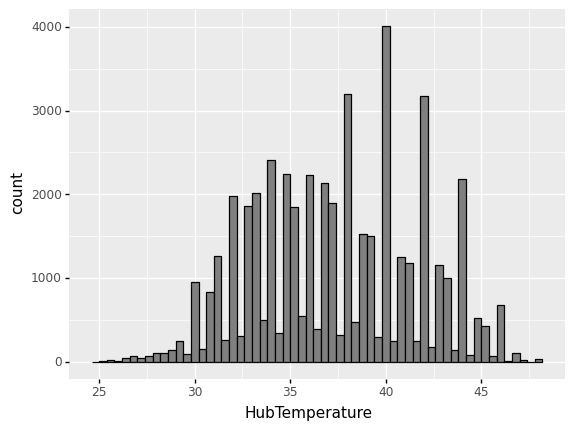

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31898 rows containing non-finite values.


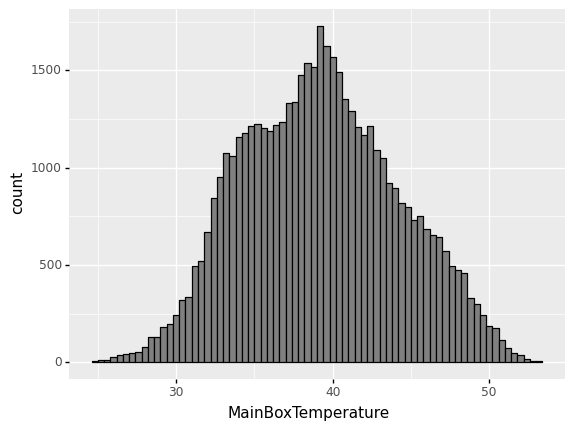

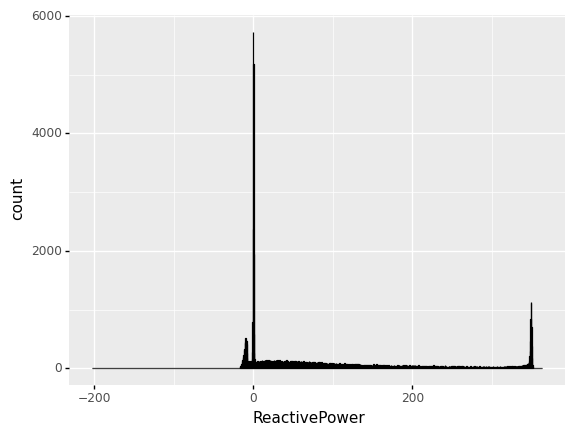

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 31541 rows containing non-finite values.


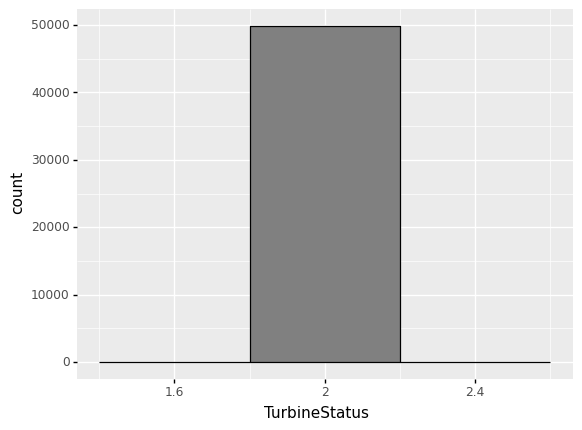

C:\Users\kunse\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 20601 rows containing non-finite values.


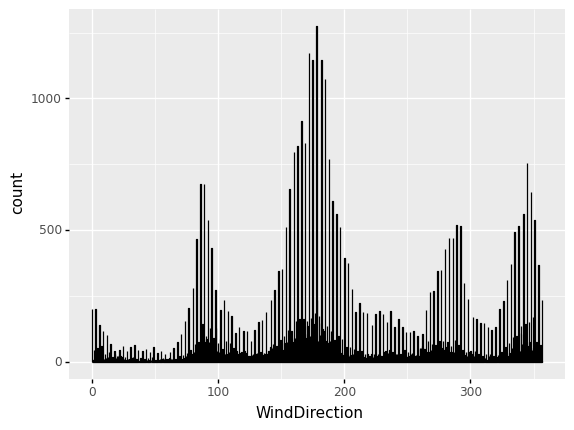

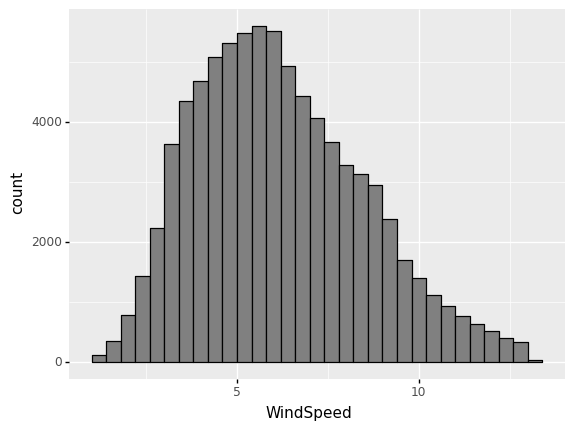

[<ggplot: (162115046319)>,
 <ggplot: (162115054409)>,
 <ggplot: (162115055463)>,
 <ggplot: (162115043648)>,
 <ggplot: (162114805622)>,
 <ggplot: (162114808372)>,
 <ggplot: (162114811748)>,
 <ggplot: (162114814498)>,
 <ggplot: (162114816338)>,
 <ggplot: (162114817290)>,
 <ggplot: (162114820410)>,
 <ggplot: (162114824180)>,
 <ggplot: (162114825256)>]

In [22]:
#checking distributions for each column beside after removing outliers
plotList = []

for col in df.columns[1:]:
    plotList.append(ggplot(df) + geom_histogram(aes(x = col),
                   binwidth = 0.4, fill = "grey", color = "black"))
plotList

In [23]:
# imputing missing values with interpolation or substitution with median did not work well
# due to the large number of missing values, imputation methods modified the distribution of data,
# and caused anamolous values at the center
# More advanced methods such as KNN imputations may work but this is outside the scope of this class

#The following code should show why imputing may not be the best solution
# df1 = pd.DataFrame(df)
# for col in df1.columns[1:]:
#     df1[col].fillna(df1[col].median(), inplace=True)

#checking distributions for each column beside after removing outliers
# plotList = []

# for col in df1.columns[1:]:
#     plotList.append(ggplot(df1) + geom_histogram(aes(x = col),
#                    binwidth = 0.4, fill = "grey", color = "black"))
# plotList

In [24]:
# multiple columns had large % of missing values for the same observations
# dropping rows with null values for the column with the least number of nans
df = df.dropna(subset=["BearingShaftTemperature"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49480 entries, 33362 to 118223
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Time                          49480 non-null  datetime64[ns, UTC]
 1   ActivePower                   49480 non-null  float64            
 2   AmbientTemperatue             49480 non-null  float64            
 3   BearingShaftTemperature       49480 non-null  float64            
 4   Blade1PitchAngle              32854 non-null  float64            
 5   GearboxBearingTemperature     49480 non-null  float64            
 6   GeneratorRPM                  49480 non-null  float64            
 7   GeneratorWinding2Temperature  49480 non-null  float64            
 8   HubTemperature                49366 non-null  float64            
 9   MainBoxTemperature            49458 non-null  float64            
 10  ReactivePower                

In [25]:
# imputing rest of the data
# interpolation works best with this data set
df.interpolate(method='pad', limit_direction='forward', axis = 0, inplace=True)

# impute remaining with median
for col in df.columns[1:]:
    df[col].fillna(df[col].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49480 entries, 33362 to 118223
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Time                          49480 non-null  datetime64[ns, UTC]
 1   ActivePower                   49480 non-null  float64            
 2   AmbientTemperatue             49480 non-null  float64            
 3   BearingShaftTemperature       49480 non-null  float64            
 4   Blade1PitchAngle              49480 non-null  float64            
 5   GearboxBearingTemperature     49480 non-null  float64            
 6   GeneratorRPM                  49480 non-null  float64            
 7   GeneratorWinding2Temperature  49480 non-null  float64            
 8   HubTemperature                49480 non-null  float64            
 9   MainBoxTemperature            49480 non-null  float64            
 10  ReactivePower                

<ipython-input-25-25e40c1218a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kunse\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


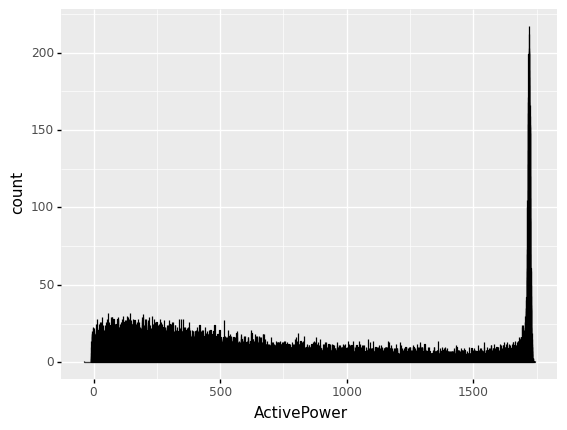

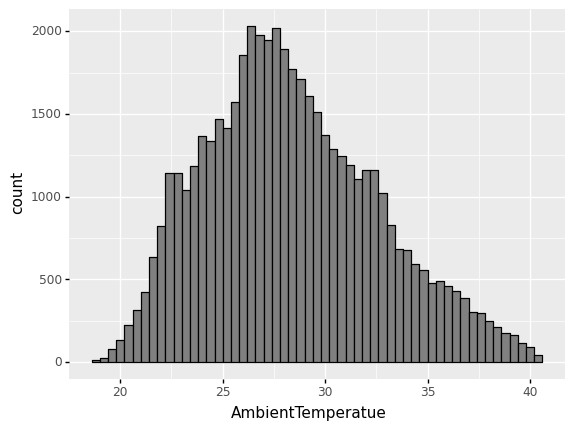

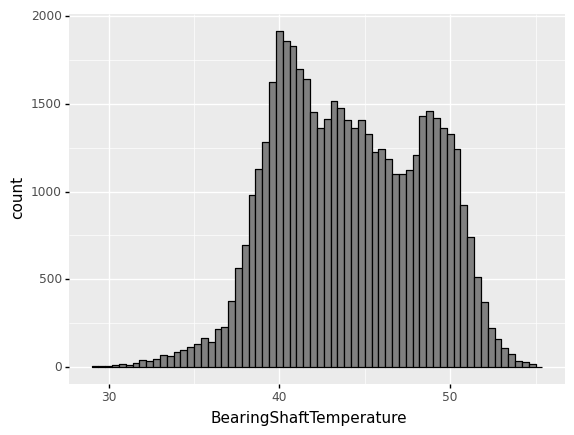

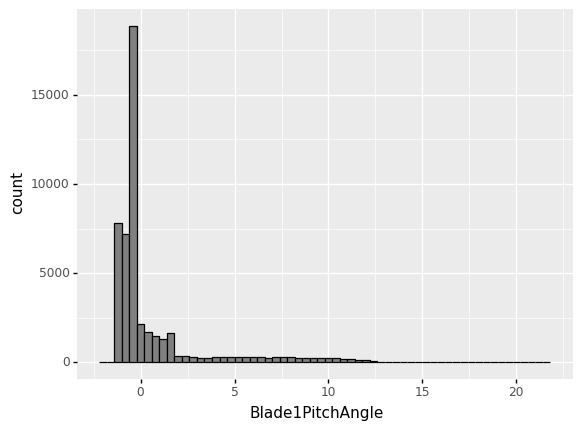

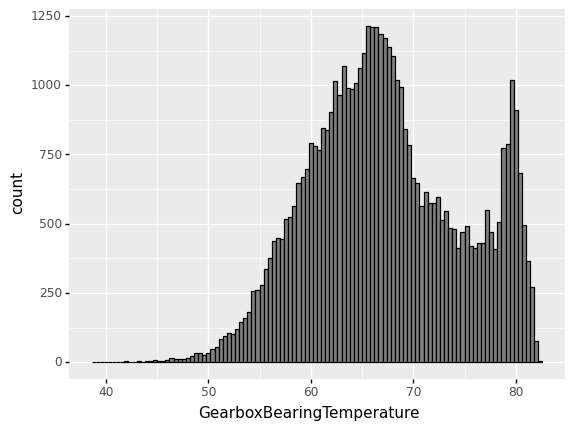

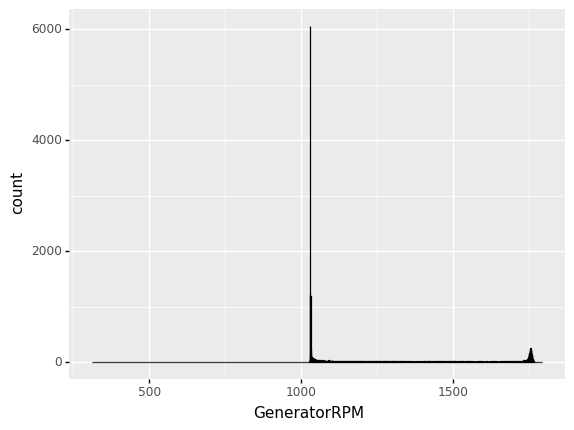

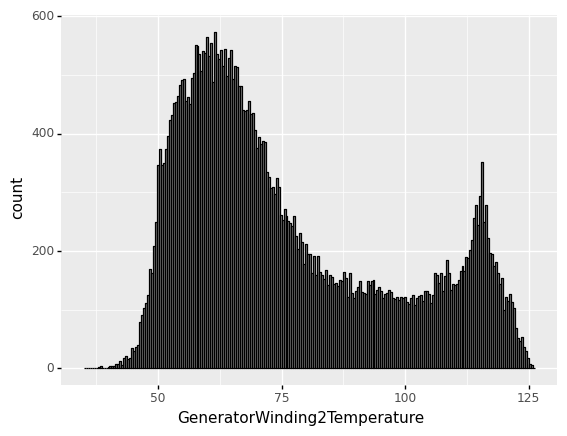

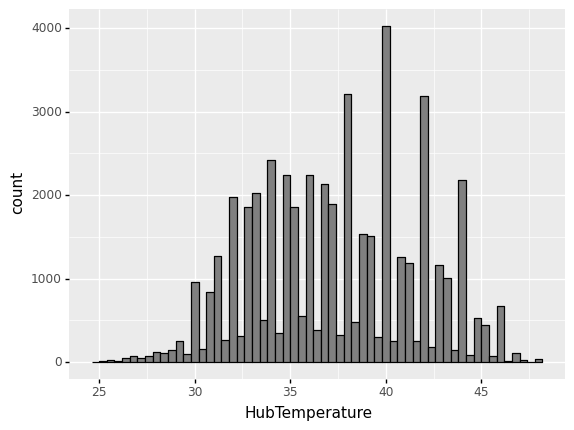

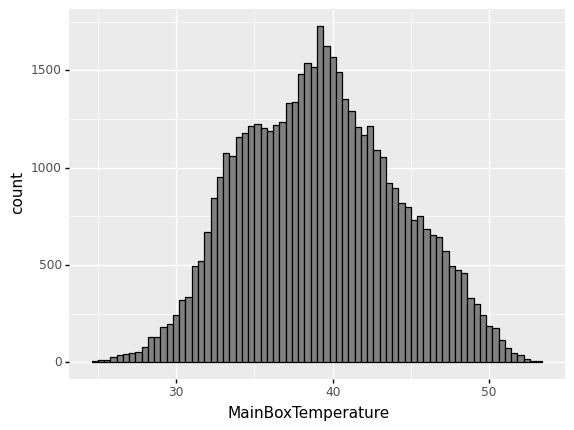

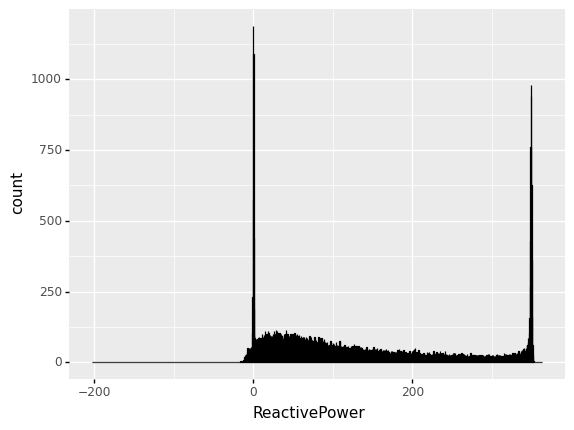

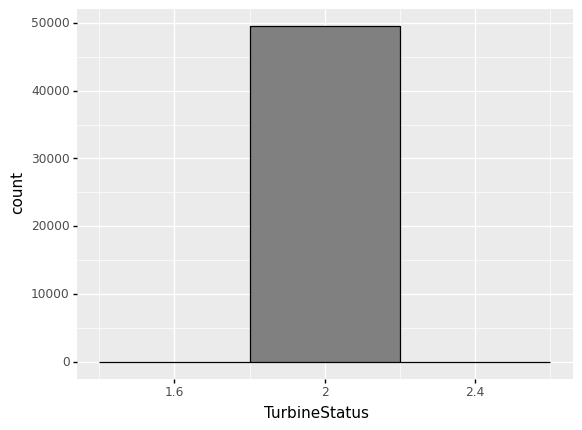

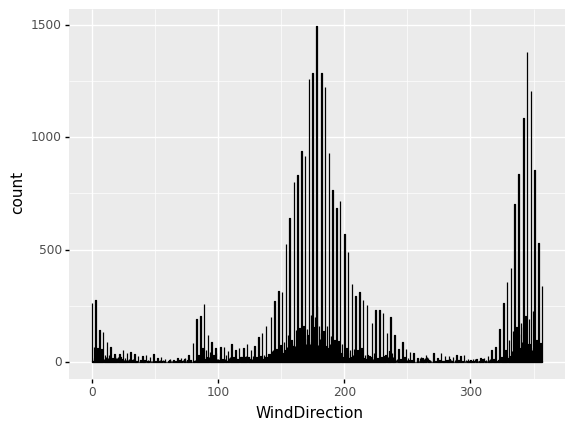

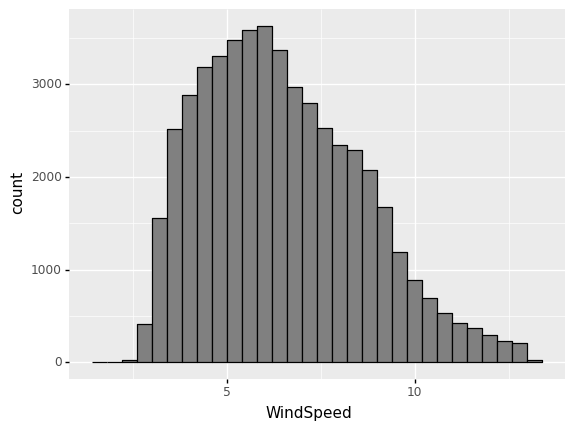

[<ggplot: (162112431029)>,
 <ggplot: (162114383743)>,
 <ggplot: (162114389384)>,
 <ggplot: (162114368389)>,
 <ggplot: (162114367013)>,
 <ggplot: (162114356797)>,
 <ggplot: (162114287698)>,
 <ggplot: (162114508653)>,
 <ggplot: (162114519077)>,
 <ggplot: (162114516950)>,
 <ggplot: (162114605424)>,
 <ggplot: (162114609830)>,
 <ggplot: (162114340479)>]

In [26]:
#checking distributions for each column beside after nans
plotList = []

for col in df.columns[1:]:
    plotList.append(ggplot(df) + geom_histogram(aes(x = col),
                   binwidth = 0.4, fill = "grey", color = "black"))
plotList
# we see that the cleaned data still retains the old shape of distributions

In [27]:
# the distribuitions still show outliers on the extreme ends so we remove outliers using percentile
cols = list(df.columns)
[cols.remove(x) for x in ["Time"]]
upper = df[cols].quantile(0.99)
lower = df[cols].quantile(0.01)
df = df[~((df[cols] < lower) |(df[cols] > (upper))).any(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41915 entries, 33362 to 118223
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Time                          41915 non-null  datetime64[ns, UTC]
 1   ActivePower                   41915 non-null  float64            
 2   AmbientTemperatue             41915 non-null  float64            
 3   BearingShaftTemperature       41915 non-null  float64            
 4   Blade1PitchAngle              41915 non-null  float64            
 5   GearboxBearingTemperature     41915 non-null  float64            
 6   GeneratorRPM                  41915 non-null  float64            
 7   GeneratorWinding2Temperature  41915 non-null  float64            
 8   HubTemperature                41915 non-null  float64            
 9   MainBoxTemperature            41915 non-null  float64            
 10  ReactivePower                

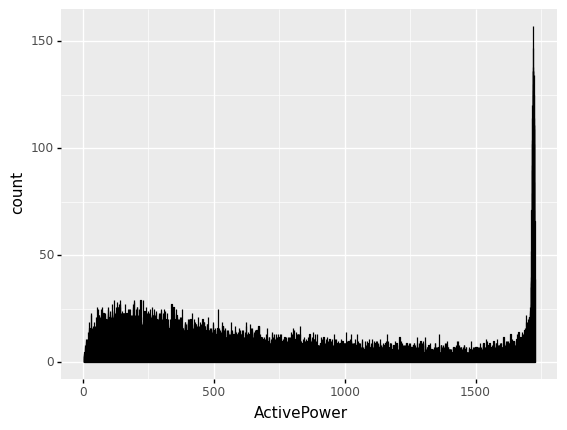

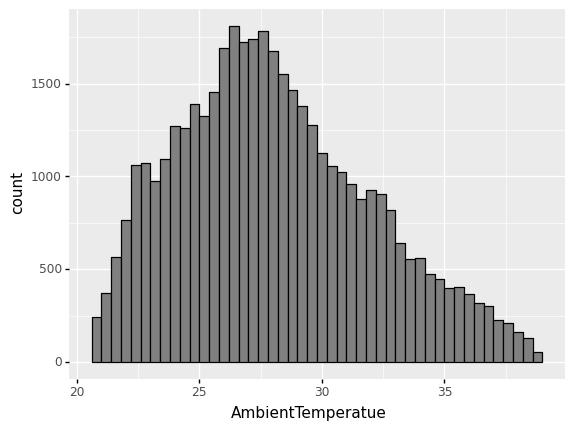

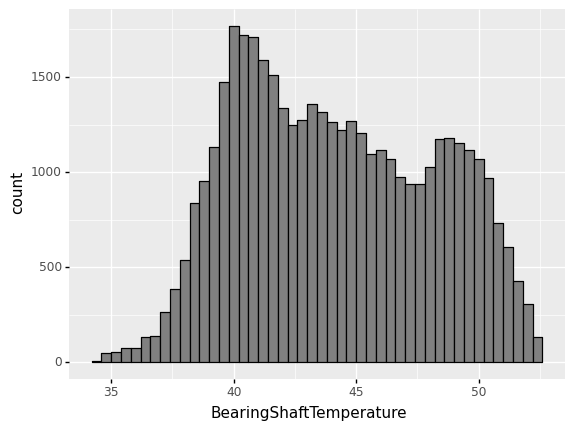

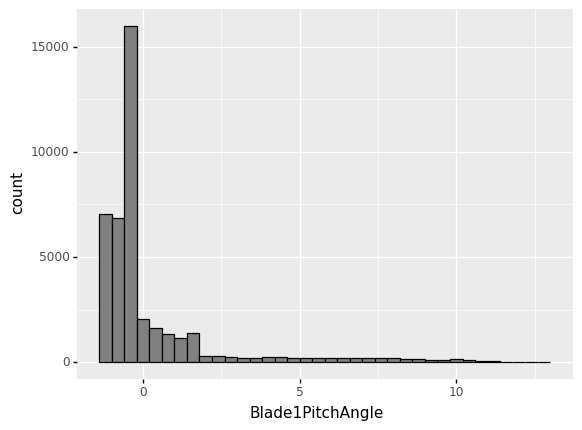

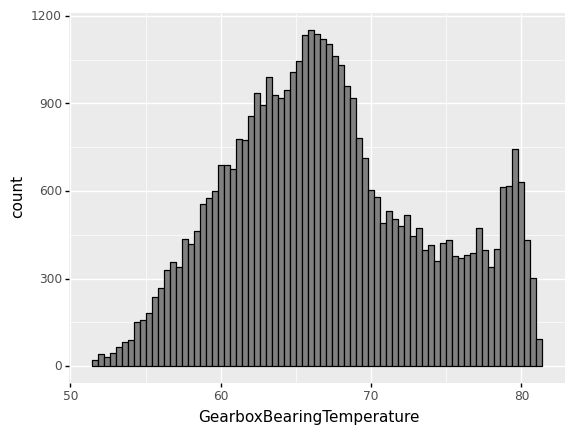

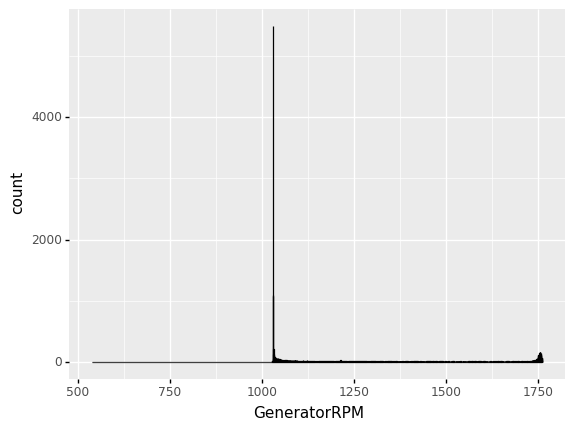

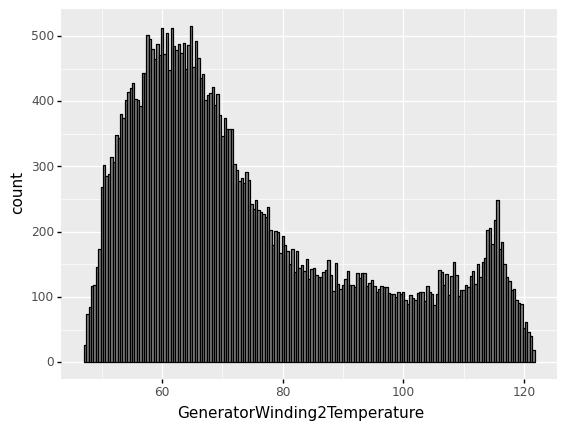

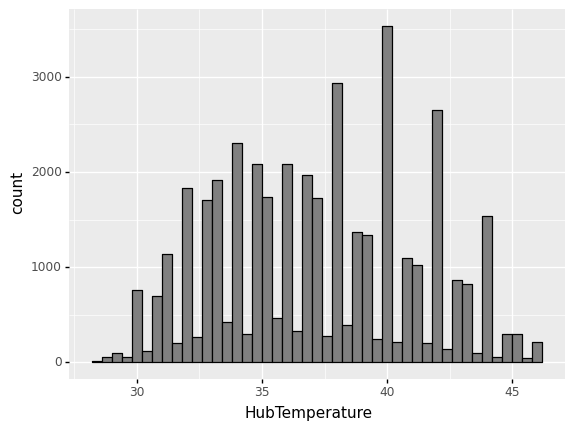

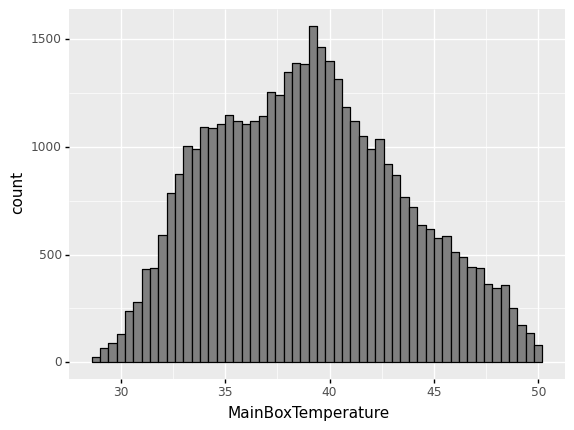

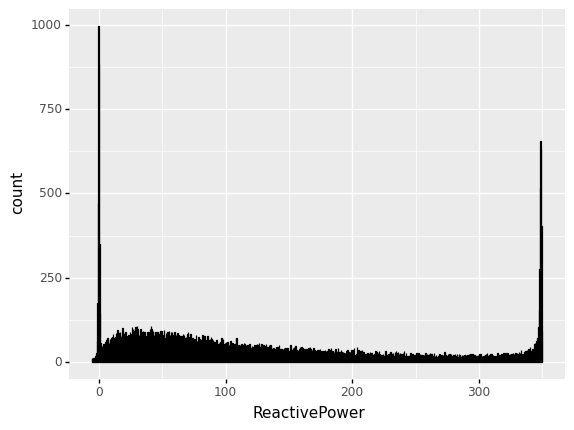

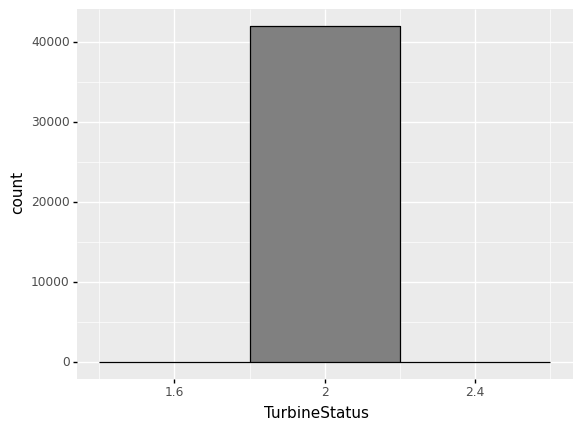

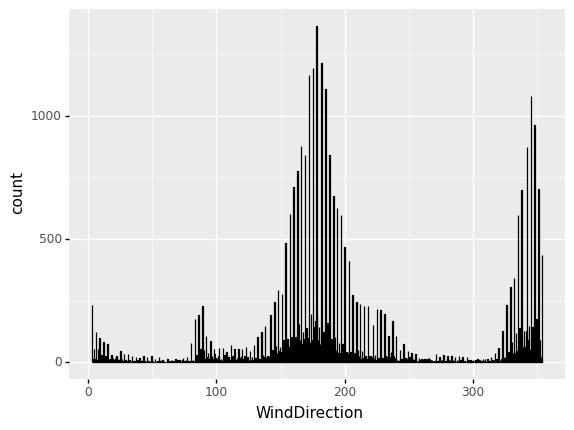

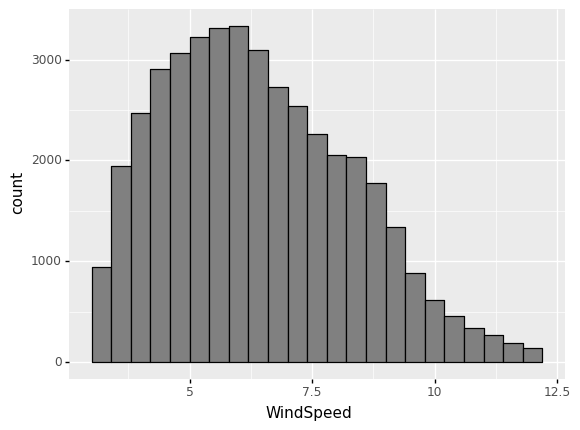

[<ggplot: (162114415746)>,
 <ggplot: (162114397320)>,
 <ggplot: (162114394950)>,
 <ggplot: (162114434166)>,
 <ggplot: (162114429507)>,
 <ggplot: (162114433907)>,
 <ggplot: (162114435121)>,
 <ggplot: (162114422881)>,
 <ggplot: (162114536220)>,
 <ggplot: (162114536780)>,
 <ggplot: (162114550538)>,
 <ggplot: (162114543674)>,
 <ggplot: (162114486260)>]

In [28]:
#checking distributions for each column beside after nans
plotList = []

for col in df.columns[1:]:
    plotList.append(ggplot(df) + geom_histogram(aes(x = col),
                   binwidth = 0.4, fill = "grey", color = "black"))
plotList

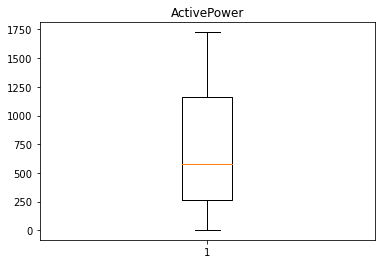

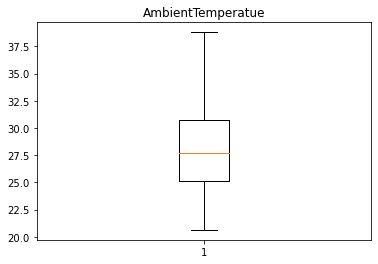

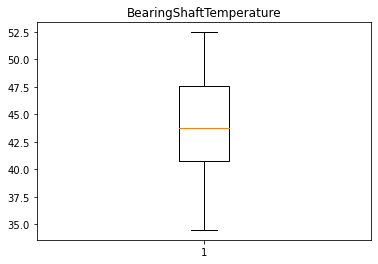

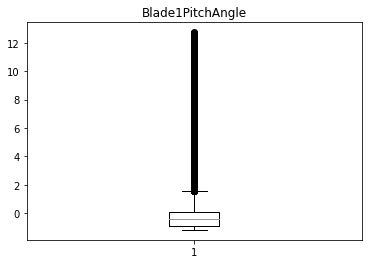

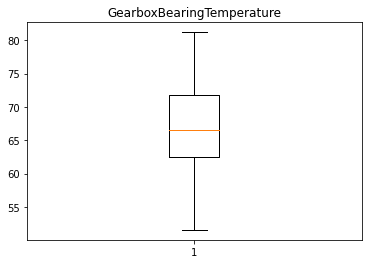

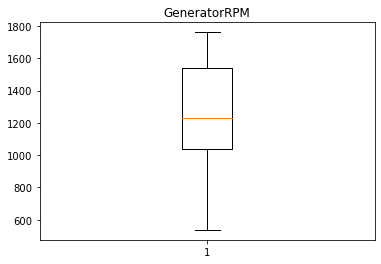

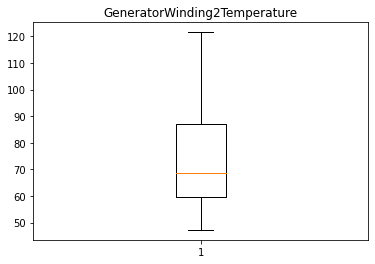

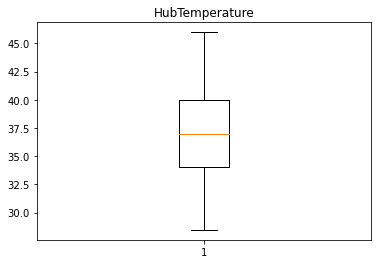

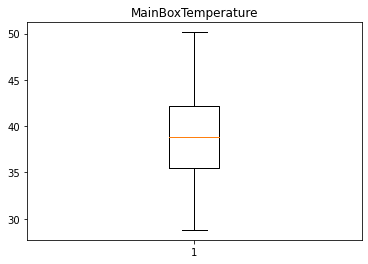

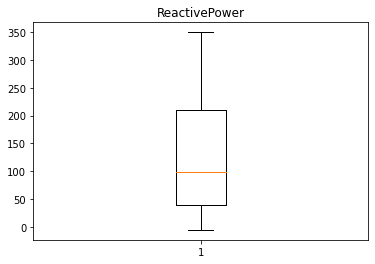

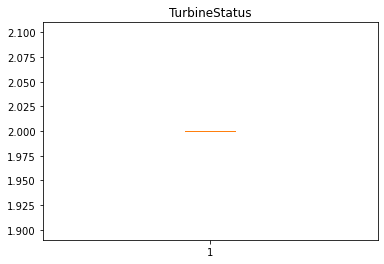

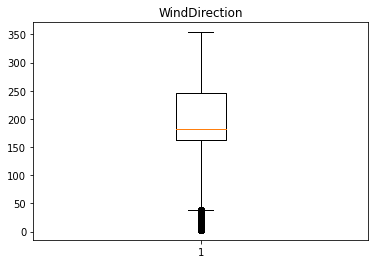

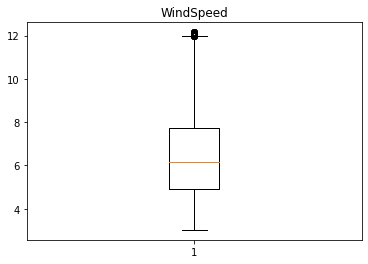

In [29]:
# identifying outliers
for col in df.columns[1:]:
    plt.subplots()
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
    
# the variable BladePitchAngle has the most outliers. This may be because it had the largest number of missing values
# we may not include analysis with this variable in our final model.

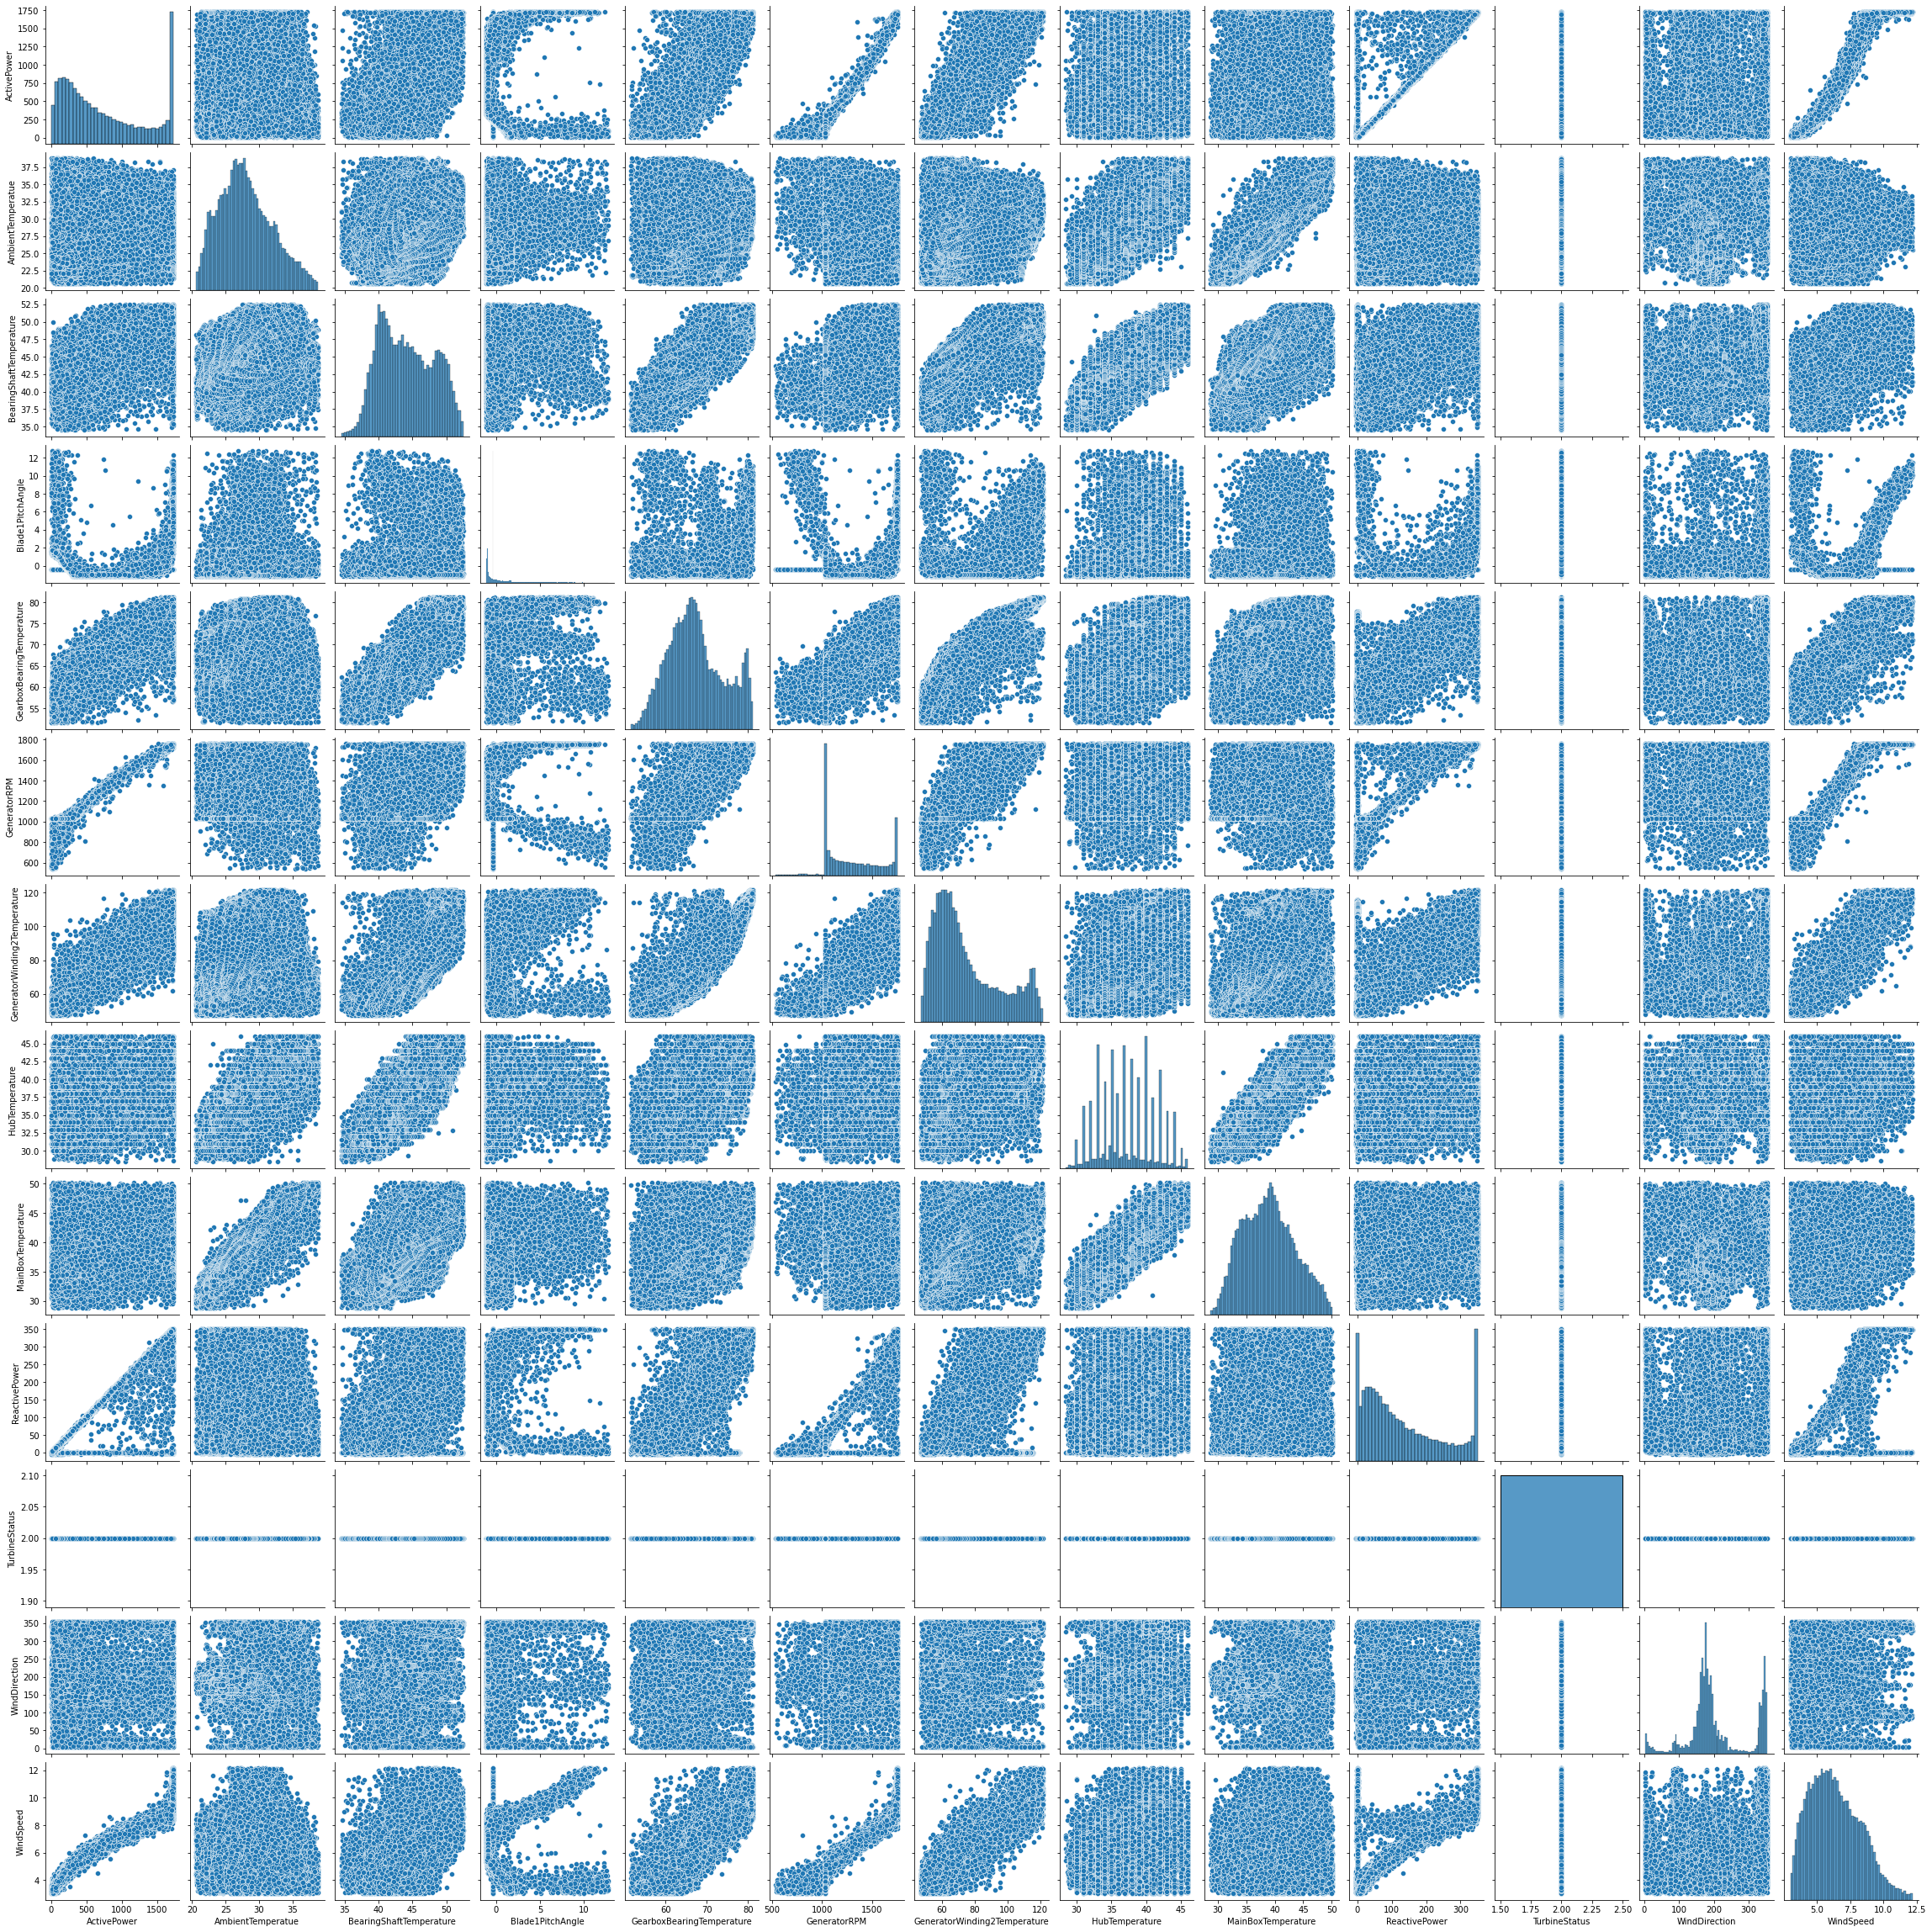

In [30]:
# checking for any relationship between variables 
df_noTime = df.drop("Time", axis=1, inplace=False)
sns.pairplot(df_noTime)

In [31]:
# NOTE : TurbineSTatus has nearly constant values/ a lot of values are the same. We may need to check the definition of this 
#variable and this also may not be included in the final model